####  Dimensionality Reduction for Visualization


In [2]:
import pickle
with open("Cleaned_Sclaed_AmazonMusic_data.pkl", "rb") as file:
    dataset = pickle.load(file)
dataset.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,mode,time_signature,duration_ms
0,-0.212859,-1.732714,-1.341306,-0.174630,1.861715,-0.315507,1.546579,0.251632,0.461200,-0.341398,0.727049,-2.412542,-0.954017
1,-1.131650,-1.750687,-1.778656,0.135215,1.848893,-0.362718,-0.390420,-0.651159,-1.502171,1.358957,0.727049,-2.412542,0.124611
2,-0.564161,-1.633862,-1.816229,-0.017747,1.868126,-0.362718,2.461000,-0.448740,-1.790267,-1.474968,0.727049,0.239272,-0.139301
3,0.550548,-0.461113,-0.972612,2.057044,1.855304,-0.362718,0.504336,0.543116,0.342130,1.075564,-1.375422,0.239272,-0.945216
4,0.374897,-1.220479,-1.354551,1.527561,1.855304,-0.362718,2.018538,1.020827,-1.592345,1.075564,0.727049,0.239272,-0.840159


In [3]:
from sklearn.decomposition import PCA
pca_obj = PCA(n_components=2, random_state=42)
dataset_pca = pca_obj.fit_transform(dataset)
dataset_pca

array([[-2.80329259, -1.40865108],
       [-3.75524942, -0.50218195],
       [-3.04692973, -0.95817919],
       ...,
       [ 1.03226757, -0.18278372],
       [ 0.70924879,  1.86619277],
       [-1.04454645,  1.21901575]], shape=(54328, 2))

#### Visualize the PCA Applied dataset



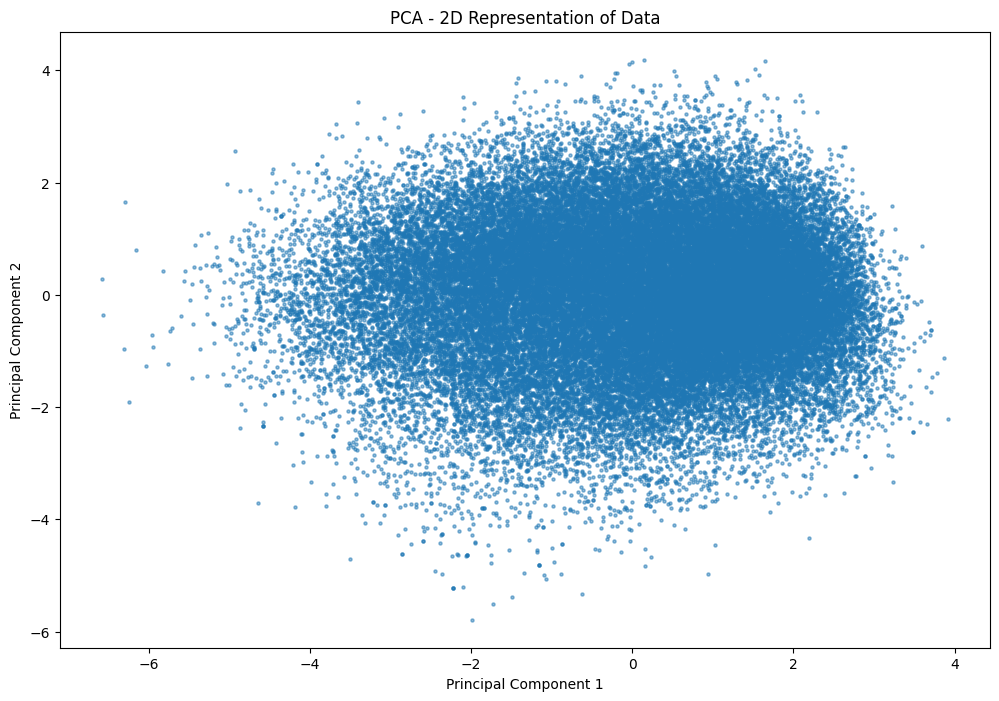

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.scatter(dataset_pca[:,0], dataset_pca[:,1], s=5, alpha=0.5)
plt.title("PCA - 2D Representation of Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [9]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
dataset_tsne = tsne.fit_transform(dataset)
dataset_tsne

array([[-35.54394 ,  21.327185],
       [-47.449234,  19.288912],
       [-26.17858 , -24.398483],
       ...,
       [ 15.38736 , -22.57728 ],
       [-14.495257,   4.673814],
       [ 14.306118,  41.54611 ]], shape=(54328, 2), dtype=float32)

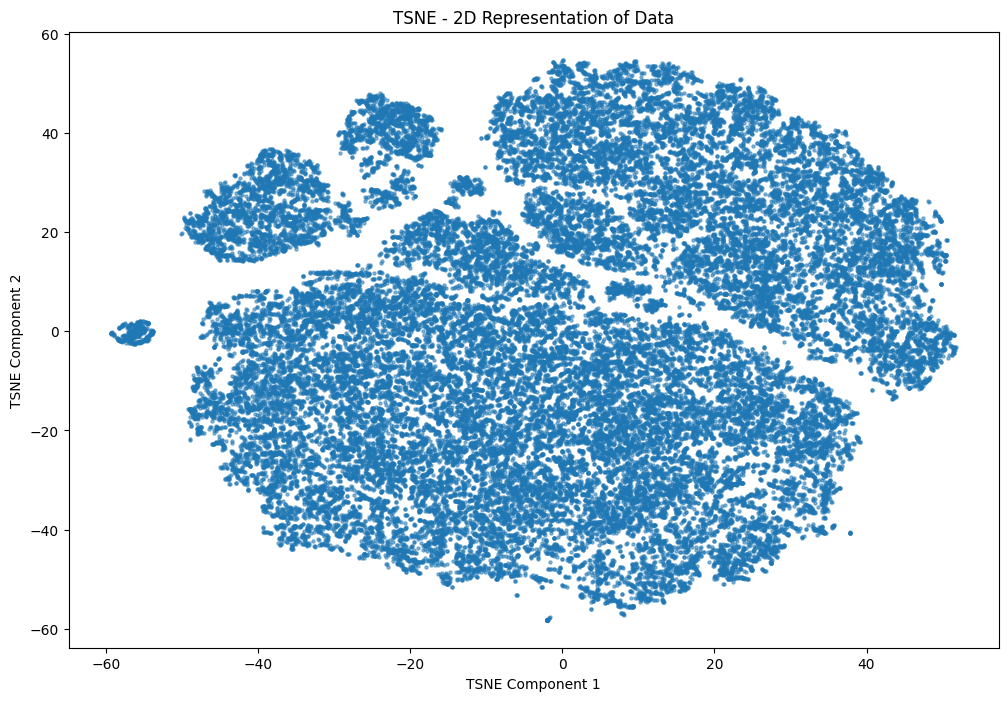

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(dataset_tsne[:,0], dataset_tsne[:,1], s=5, alpha=0.5)
plt.title("TSNE - 2D Representation of Data")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.show()

In [5]:
pca=PCA(0.95)
dataset_pca = pca.fit_transform(dataset)
dataset_pca.shape

(54328, 11)

In [7]:
pca.n_components_

np.int64(11)

In [8]:
pca.explained_variance_ratio_

array([0.20706964, 0.11942207, 0.08930105, 0.08446091, 0.07826847,
       0.07637497, 0.07017134, 0.0692611 , 0.06411128, 0.05444925,
       0.04226016])

In [9]:
dataset_pca

array([[-2.80329259, -1.40865108,  2.18398338, ..., -0.29114321,
         1.12376142,  0.35010056],
       [-3.75524942, -0.50218195, -0.13563719, ...,  1.43100421,
         0.80804113, -0.03201612],
       [-3.04692973, -0.95817919,  1.10992563, ..., -0.14609181,
         1.06813783,  0.21489505],
       ...,
       [ 1.03226757, -0.18278372,  1.47015024, ..., -0.76143082,
        -0.2984327 , -0.35317287],
       [ 0.70924879,  1.86619277,  0.31009054, ...,  0.49486138,
        -0.51834965,  0.1214391 ],
       [-1.04454645,  1.21901575, -0.41773   , ..., -1.24963462,
        -0.61830258,  1.07299407]], shape=(54328, 11))

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
k_range = range(1,11)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(dataset_pca)
    sse.append(km.inertia_)

sse

[674588.2280896842,
 572693.3995688634,
 538376.4653008153,
 512917.37580300943,
 471702.2922181807,
 449976.1960841394,
 423226.2906737647,
 403051.7585935819,
 388081.198549293,
 378139.33364599396]

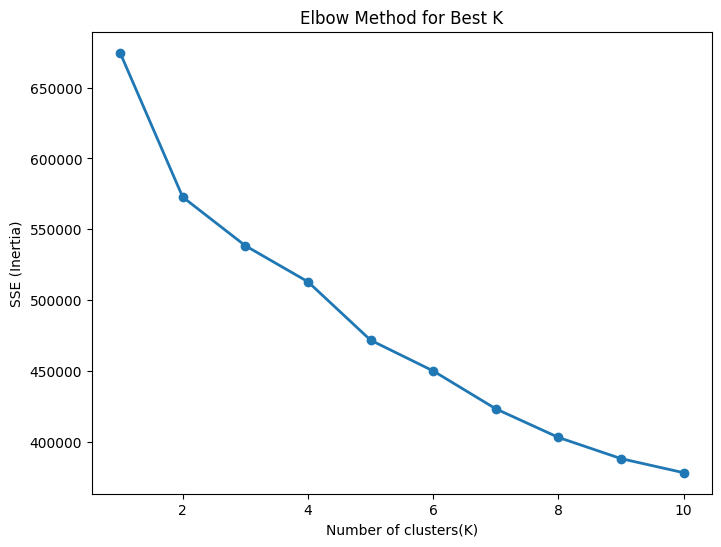

In [11]:
plt.figure(figsize=(8,6))
plt.plot(k_range, sse, 'o-',linewidth=2)
plt.xlabel('Number of clusters(K)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for Best K')
plt.show()

In [15]:
## Use sample for finding Silhouette Score
import numpy as np
sample_index = np.random.choice(dataset_pca.shape[0], 5000, replace=False)
sample_data = dataset.iloc[sample_index]
sample_data.shape

(5000, 13)

In [17]:
for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(sample_data)
    score = silhouette_score(sample_data, km.labels_)
    print(f"K : {k}  |  Silhouette_score : {score:.4f}")

K : 2  |  Silhouette_score : 0.1486
K : 3  |  Silhouette_score : 0.1429
K : 4  |  Silhouette_score : 0.1102
K : 5  |  Silhouette_score : 0.1175
K : 6  |  Silhouette_score : 0.1075
K : 7  |  Silhouette_score : 0.0957
K : 8  |  Silhouette_score : 0.1072
K : 9  |  Silhouette_score : 0.1004
K : 10  |  Silhouette_score : 0.0957


In [19]:
best_k = 2
km = KMeans(n_clusters=best_k, random_state=42)
labels = km.fit_predict(dataset_pca)
dataset_pca

array([[-2.80329259, -1.40865108,  2.18398338, ..., -0.29114321,
         1.12376142,  0.35010056],
       [-3.75524942, -0.50218195, -0.13563719, ...,  1.43100421,
         0.80804113, -0.03201612],
       [-3.04692973, -0.95817919,  1.10992563, ..., -0.14609181,
         1.06813783,  0.21489505],
       ...,
       [ 1.03226757, -0.18278372,  1.47015024, ..., -0.76143082,
        -0.2984327 , -0.35317287],
       [ 0.70924879,  1.86619277,  0.31009054, ...,  0.49486138,
        -0.51834965,  0.1214391 ],
       [-1.04454645,  1.21901575, -0.41773   , ..., -1.24963462,
        -0.61830258,  1.07299407]], shape=(54328, 11))

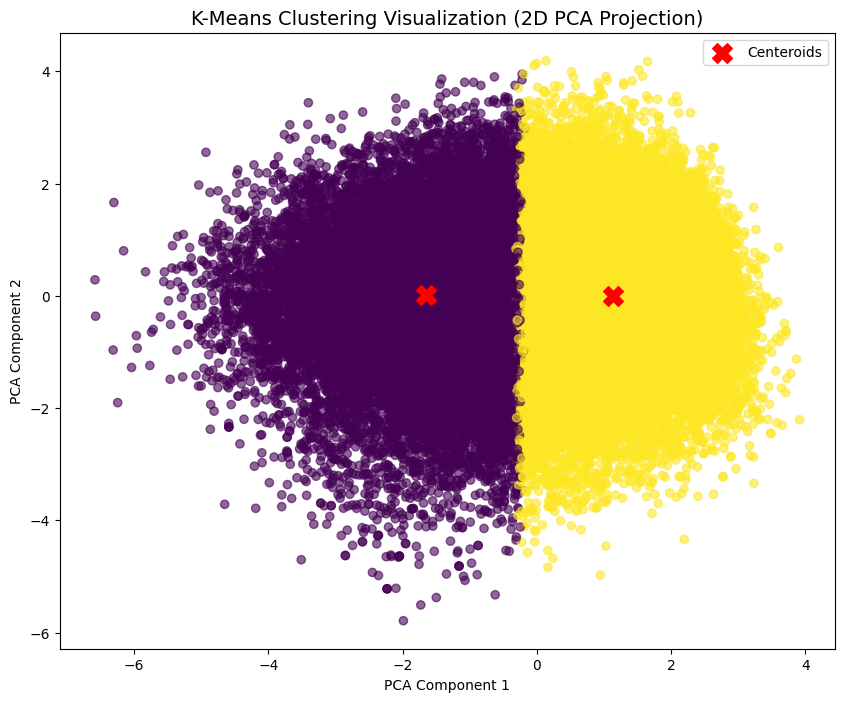

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(dataset_pca)

plt.figure(figsize=(10,8))
plt.scatter(df_pca[:,0], df_pca[:,1], c=labels,cmap='viridis', alpha=0.6)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=200, c='red', marker='X',label='Centeroids')
plt.title("K-Means Clustering Visualization (2D PCA Projection)", fontsize=14)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
sil_score = silhouette_score(dataset_pca, labels)
davies_score = davies_bouldin_score(dataset_pca, labels)
inertia = km.inertia_

print(f"KMeans Silhouette score : {sil_score:.4f}")
print(f"Kmeans davies bouldin score : {davies_score:.4f}")
print(f"Kmeans Inertia : {inertia:2f}")

KMeans Silhouette score : 0.1546
Kmeans davies bouldin score : 2.2333
Kmeans Inertia : 572693.399569
